<a href="https://colab.research.google.com/github/cmack02/win-share/blob/main/Predicting_win_shares_test_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
year = 2022
url = "https://www.basketball-reference.com/leagues/NBA_2022_per_game.html#per_game_stats"
html = urlopen(url)
soup = BeautifulSoup(html)

In [6]:
soup.findAll('tr', limit=2)
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
headers = headers[1:]
headers

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [7]:
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [21]:
stats = pd.DataFrame(player_stats, columns = headers)
stats.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,.439,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,.547,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,.557,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,.402,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,.550,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
5,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,.372,...,.743,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6
6,Nickeil Alexander-Walker,SG,23,NOP,50,19,26.3,4.7,12.6,.375,...,.722,0.7,2.6,3.3,2.8,0.8,0.4,1.7,1.8,12.8
7,Nickeil Alexander-Walker,SG,23,UTA,15,2,9.9,1.1,3.2,.333,...,.917,0.1,1.5,1.5,1.1,0.3,0.3,0.5,1.0,3.5
8,Grayson Allen,SG,26,MIL,66,61,27.3,3.9,8.6,.448,...,.865,0.5,2.9,3.4,1.5,0.7,0.3,0.7,1.5,11.1
9,Jarrett Allen,C,23,CLE,56,56,32.3,6.6,9.7,.677,...,.708,3.4,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1


In [3]:
import pandas as pd
stats_2021 = pd.read_csv('2021.csv')
stats_2022 = pd.read_csv('2022.csv')


stats_2021 = stats_2021[['Player', 'Pos_x','G_x','MP_x','PS/G','AST','TRB','3P%','FG%','FT%','eFG%','VORP','TS%','BPM','PER','WS']]
stats_2022 = stats_2022[['Player', 'Pos_x','G_x','MP_x','PS/G','AST','TRB','3P%','FG%','FT%','eFG%','VORP','TS%','BPM','PER','WS']]

stats_2021.columns = ['Player', 'Pos','G','MP','PS/G','AST','TRB','3P%','FG%','FT%','eFG%','VORP','TS%','BPM','PER','WS']
stats_2022.columns = ['Player', 'Pos','G','MP','PS/G','AST','TRB','3P%','FG%','FT%','eFG%','VORP','TS%','BPM','PER','WS']


ws_2022 = stats_2022[['Player', 'WS']]

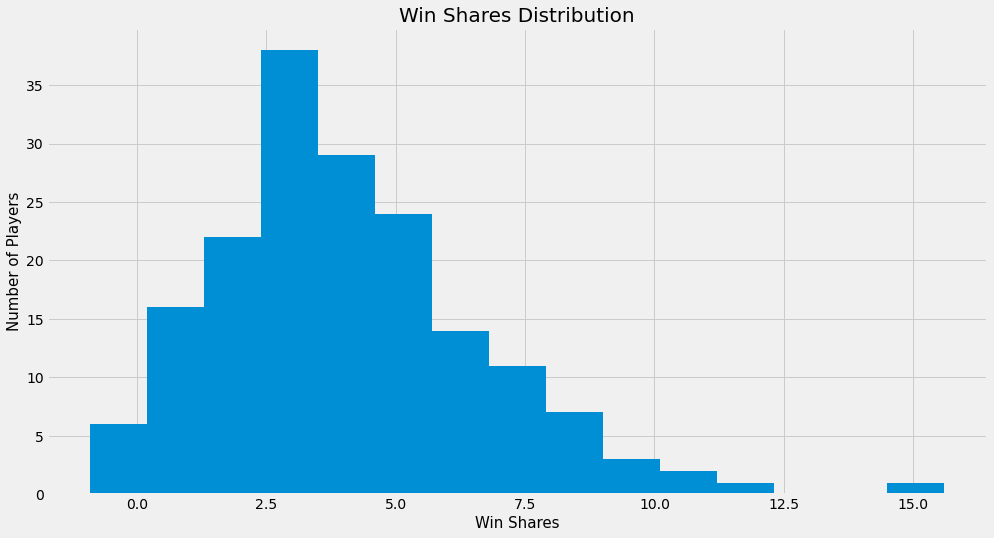

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,8))
plt.hist(stats_2021['WS'], bins = 15)
plt.xlabel('Win Shares', size = 15)
plt.ylabel('Number of Players', size = 15)
plt.title('Win Shares Distribution', size = 20);

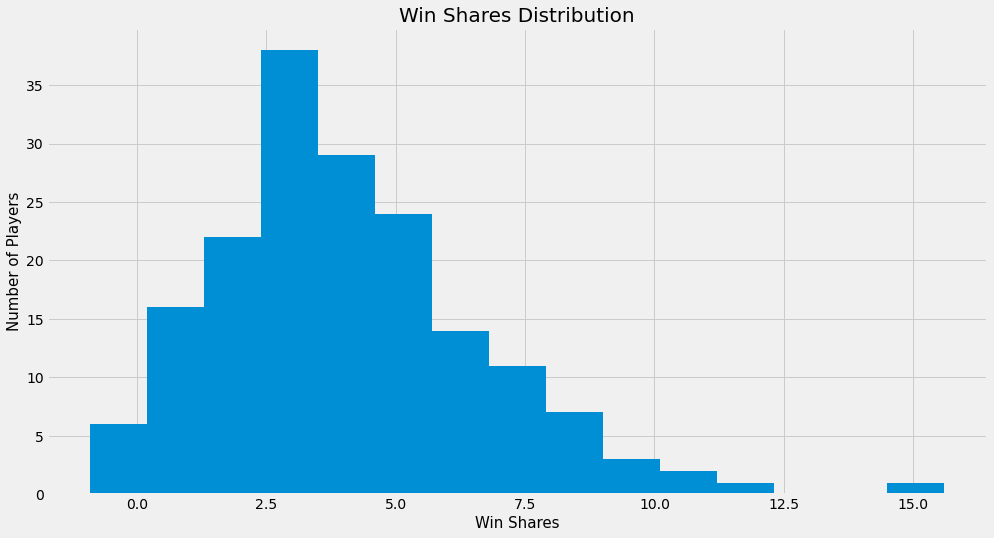

In [24]:

stats_2021 = stats_2021[stats_2021['G'] > 30]
stats_2022 = stats_2022[stats_2022['G'] > 30]

stats_2021 = stats_2021[stats_2021['MP'] > 25]
stats_2022 = stats_2022[stats_2022['MP'] > 25]

plt.figure(figsize = (15,8))
plt.hist(stats_2021['WS'], bins = 15)
plt.xlabel('Win Shares', size = 15)
plt.ylabel('Number of Players', size = 15)
plt.title('Win Shares Distribution', size = 20);

In [25]:
corr_2021 = stats_2021.corr()['WS'].reset_index()
corr_2021 = corr_2021.sort_values([('WS')], ascending = False)
corr_2021

,index,WS
13,WS,1.000000
9,VORP,0.897558
11,BPM,0.835594
12,PER,0.787570
10,TS%,0.740994
6,FG%,0.639545
8,eFG%,0.614691
4,TRB,0.504184
2,PS/G,0.500177
1,MP,0.436604


In [16]:

train, test = train_test_split(stats_2021, test_size=0.25, random_state=99)

x_train = train[['PS/G','TS%','TRB','VORP','PER','MP']]
y_train = train[['WS']]

x_test = test[['PS/G','TS%','TRB','VORP','PER','MP']]
y_test = test[['WS']]


In [26]:
linReg = linear_model.LinearRegression()
linReg.fit(x_train, y_train)

linReg.predict(x_test)

y_lin_pred = linReg.predict(x_test)

print('Score: %.3f' % linReg.score(x_train, y_train))
print('Mean squared error: %.3f' % mean_squared_error(y_test, y_lin_pred))
print('Mean Absolute error: %.3f' % mean_absolute_error(y_test, y_lin_pred))
print('Variance score: %.3f' % r2_score(y_test, y_lin_pred))

Score: 0.895
Mean squared error: 0.876
Mean Absolute error: 0.758
Variance score: 0.866


In [ ]:
svr = SVR(kernel='rbf', gamma=1e-3, C=150, epsilon=0.3)
svr.fit(x_train, y_train.values.ravel())

y_svr_pred = svr.predict(x_test)

print('Score: %.3f' % svr.score(x_train, y_train))
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_svr_pred))
print('Mean Absolute error: %.3f' % mean_absolute_error(y_test, y_svr_pred))
print('Variance score: %.3f' % r2_score(y_test, y_svr_pred))


Score: 0.883
Mean squared error: 0.891
Mean Absolute error: 0.729
Variance score: 0.843


In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 7, weights = 'uniform')
knn.fit(x_train, y_train)

y_knn = knn.predict(x_test)

print('Score: %.3f' % knn.score(x_train, y_train))
print("Mean Squared Error: %.3f" % mean_squared_error(y_test, y_knn))
print('Mean Absolute error: %.3f' % mean_absolute_error(y_test, y_knn))
print('Variance Score: %.3f' % r2_score(y_test, y_knn))

Score: 0.644
Mean Squared Error: 1.770
Mean Absolute error: 1.061
Variance Score: 0.689


In [27]:
# Predict Win Shares using Linear Regression Model
stats_2022 = stats_2022[stats_2022['G'] > 30]
stats_2022 = stats_2022[stats_2022['MP'] > 25]
lin_new = stats_2022[['PS/G','TS%','TRB','VORP','PER','MP']]

lin_pred_2022 = linReg.predict(lin_new)

lin_names = stats_2022.iloc[:, 0]
a = []
for i, j in zip(lin_pred_2022, lin_names):
    a.append({'WS_pred':i,'Player':j})

lin_wins = pd.DataFrame(a)
lin_wins['WS_pred'] = round(lin_wins['WS_pred'].astype(float),2)

lin_wins = lin_wins.sort_values([('WS_pred')], ascending = False).reset_index(drop=True).head(10)
lin_wins = lin_wins.merge(ws_2022, on = 'Player', how = 'inner')


pos = np.arange(len(lin_wins['WS_pred']))

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos, lin_wins['WS_pred'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Predicted')
plt.bar(pos + .4, lin_wins['WS'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Actual',color = 'darkseagreen')
for i in pos:
    plt.text(pos[i], 0.5, s = lin_wins['Player'][i],ha='center', va='bottom', rotation = 'vertical',color = 'white', size = 25)
plt.text(x = -1.5, y = 18, s = '2023 NBA Predicted vs Actual Win Shares - Top 10 Players',fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -1.5, y = 17, s = 'Wins shares are predicted with Linear Regression model',fontsize = 19, alpha = .85)
plt.text(x = -1.5, y = -1.5, s = 'National Basketball Association                                                                                       Source: Basketball-Reference.com ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
plt.xticks([],[])
plt.legend(prop={'size': 20})
ax.set_ylabel('Win Shares', size = 25);

ValueError: ignored

In [29]:
# Predict Win Shares using Linear Regression Model

lin_new = stats_2022[['PS/G','TS%','TRB','VORP','PER','MP']]

lin_pred_2022 = linReg.predict(lin_new)

lin_names = stats_2022.iloc[:, 0]
a = []
for i, j in zip(lin_pred_2022, lin_names):
    a.append({'WS_pred':i,'Player':j})

lin_wins = pd.DataFrame(a)
lin_wins['WS_pred'] = round(lin_wins['WS_pred'].astype(float),2)

lin_wins = lin_wins.sort_values([('WS_pred')], ascending = False).reset_index(drop=True).head(10)
lin_wins = lin_wins.merge(ws_2022, on = 'Player', how = 'inner')


pos = np.arange(len(lin_wins['WS_pred']))

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos, lin_wins['WS_pred'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Predicted')
plt.bar(pos + .4, lin_wins['WS'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Actual',color = 'darkseagreen')
for i in pos:
    plt.text(pos[i], 0.5, s = lin_wins['Player'][i],ha='center', va='bottom', rotation = 'vertical',color = 'white', size = 25)
plt.text(x = -1.5, y = 18, s = '2023 NBA Predicted vs Actual Win Shares - Top 10 Players',fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -1.5, y = 17, s = 'Wins shares are predicted with Linear Regression model',fontsize = 19, alpha = .85)
plt.text(x = -1.5, y = -1.5, s = 'National Basketball Association                                                                                       Source: Basketball-Reference.com ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
plt.xticks([],[])
plt.legend(prop={'size': 20})
ax.set_ylabel('Win Shares', size = 25);

ValueError: ignored